In [10]:
import gym
import random
import tensorflow as tf
from collections import deque
import numpy as np
import sklearn


# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras

In [11]:
# Let's build the DQN. 
# Given a state, it will estimate, for each possible action, the sum of discounted future rewards it can expect after 
# it plays that action (but before it sees its outcome):

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

env = gym.make("CliffWalking-v0")
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Definir el modelo
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [12]:
##########  Using gym
import gym

# Scikit-Learn ≥0.20 is required
import sklearn

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
# Common imports
import numpy as np
import os
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

In [14]:
import numpy as np
from collections import deque
import random

# Define los parámetros del modelo
n_episodes = 100         # número de episodios para entrenar
n_steps = 100             # número máximo de pasos por episodio
memory_size = 10000       # tamaño máximo de la memoria de repetición
batch_size = 32           # tamaño del lote para el aprendizaje por lotes
gamma = 0.95              # factor de descuento para las recompensas
epsilon_start = 1.0       # valor inicial de epsilon para la exploración
epsilon_end = 0.01        # valor final de epsilon para la exploración
epsilon_decay = 0.995     # tasa de decaimiento de epsilon por episodio

# Inicializa la memoria de repetición
memory = deque(maxlen=memory_size)

# Inicializa el valor de epsilon
epsilon = epsilon_start

# Itera a través de los episodios de entrenamiento
for episode in range(n_episodes):

    # Resetea el entorno para el nuevo episodio
    state = np.array(env.reset())
    done = False
    total_reward = 0
    
    # Itera a través de los pasos del episodio
    for step in range(n_steps):
        
        # Elige una acción usando la política epsilon-greedy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            
            q_values = model.predict(state.reshape(1, -1))
            action = np.argmax(q_values[0])
            
        # Ejecuta la acción y observa el resultado
        next_state, reward, done, _ = env.step(action)
        next_state = np.array(next_state)
        total_reward += reward
        
        # Añade la experiencia a la memoria de repetición
        memory.append((state, action, reward, next_state, done))
        
        # Actualiza el estado actual
        state = next_state
        
        # Realiza el aprendizaje por lotes si la memoria de repetición es lo suficientemente grande
        if len(memory) >= batch_size:
            batch = np.array(random.sample(memory, batch_size))
            states = np.array(batch[:, 0].tolist())
            actions = np.array(batch[:, 1].tolist())
            rewards = np.array(batch[:, 2].tolist())
            next_states = np.array(batch[:, 3].tolist())
            dones = np.array(batch[:, 4].tolist())
            
            targets = model.predict(states)
            q_next = np.amax(model.predict(next_states), axis=1)
            targets[np.arange(batch_size), actions] = rewards + gamma * (1 - dones) * q_next
            
            model.fit(states, targets, epochs=1, verbose=0)
            
        # Sal del bucle si el episodio ha terminado
        if done:
            break
      # Lista para almacenar las sumas de las recompensas por episodio
    episode_rewards = []

    # Sal del bucle si el episodio ha terminado
    if done:
    # Agrega la suma de las recompensas para este episodio a la lista
        episode_rewards.append(total_reward)
    # Imprime los resultados del episodio
        print("Episodio {}, Total Reward: {}, Epsilon: {:.4f}".format(episode, total_reward, epsilon))

    # Imprime la suma de las recompensas para los últimos 10 episodios
    if episode > 0 and episode % 10 == 0:
        print("Suma de recompensas de los últimos 10 episodios:", sum(episode_rewards[-10:]))

            
    # Reduce el valor de epsilon después de cada episodio
    epsilon = max(epsilon_end, epsilon * epsilon_decay)
    
    # Imprime los resultados del episodio
    print("Episodio {}, Total Reward: {}, Epsilon: {:.4f}".format(episode, total_reward, epsilon))

1/1 [==============================] - 0s 25ms/step
Episodio 0, Total Reward: -595, Epsilon: 0.9950
1/1 [==============================] - 0s 28ms/step
Episodio 1, Total Reward: -892, Epsilon: 0.9900
1/1 [==============================] - 0s 22ms/step
Episodio 2, Total Reward: -298, Epsilon: 0.9851
1/1 [==============================] - 0s 33ms/step
Episodio 3, Total Reward: -1288, Epsilon: 0.9801
1/1 [==============================] - 0s 26ms/step
Episodio 4, Total Reward: -1189, Epsilon: 0.9752
1/1 [==============================] - 0s 35ms/step
Episodio 5, Total Reward: -496, Epsilon: 0.9704
1/1 [==============================] - 0s 28ms/step
Episodio 6, Total Reward: -1288, Epsilon: 0.9655
1/1 [==============================] - 0s 29ms/step
Episodio 7, Total Reward: -2179, Epsilon: 0.9607
1/1 [==============================] - 0s 34ms/step
Episodio 8, Total Reward: -892, Epsilon: 0.9559
1/1 [==============================] - 0s 46ms/step
Episodio 9, Total Reward: -595, Epsilon: 0.9

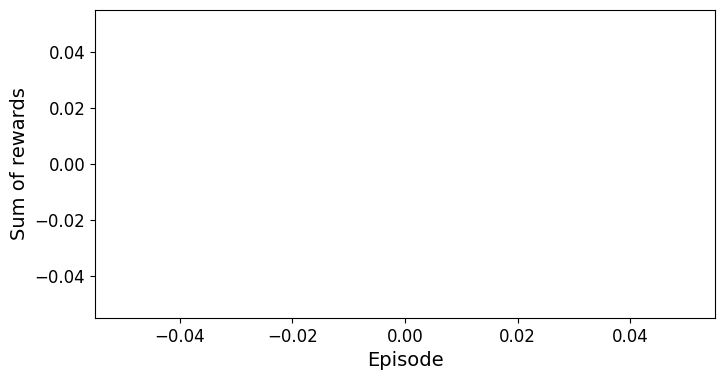

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(episode_rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
plt.show()

In [16]:
episode_rewards

[]